In [ ]:
from notebooks import *
figsize(aspect=1/4)

INFO     [14:49:52.801] [92734] 151 logging_/<module>: {logging_yaml: None}

In [ ]:
import jinja2
env = jinja2.Environment(undefined=jinja2.StrictUndefined)
env.filters['dquote'] = lambda s: json.dumps(s)

In [ ]:
ex_dir = '/Users/danb/src/Sporth/examples'
oneart = f'{ex_dir}/oneart.wav'

def _sporth(sp, sample_rate=44100, channels=1, out_path='/tmp/0.wav'):
    !sporth <<<{shlex.quote(sp)} -r {sample_rate} -c {channels} -o {shlex.quote(out_path)}

def sporth(sp, out_path='/tmp/0.wav', raw=True, **kwargs):
    _sporth(sp, out_path=out_path, **kwargs)
    audio = audiosegment.from_file(out_path).resample(sample_rate_Hz=22050, channels=1)
    display(audio)
    Melspectro(audio, n_mels=100).plot(raw=raw)

/Users/danb/src/Sporth/examples/oneart.wav: 1 channels, 32 bit, sampled @ 22.05 kHz, 8.966s long

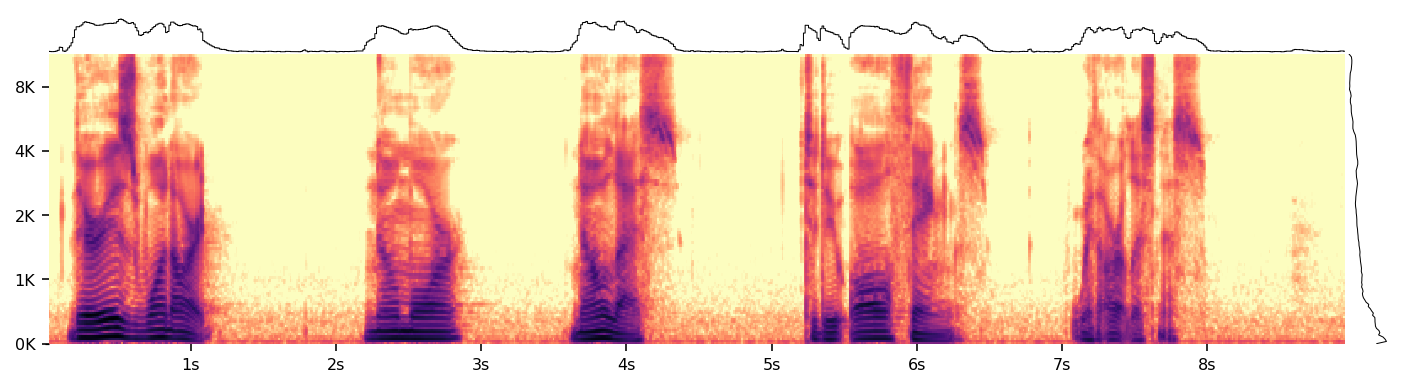

In [ ]:
# Inspect the full audio
audio = audiosegment.from_file(oneart).resample(sample_rate_Hz=22050, channels=1)
display(audio)
Melspectro(audio, n_mels=100).plot(raw=False)

rec_dur: "8.96583",
rec_size: "395393",
rec_dur: "8.96583",
rec_size: "395393",


/tmp/0.wav: 1 channels, 32 bit, sampled @ 22.05 kHz, 8.966s long

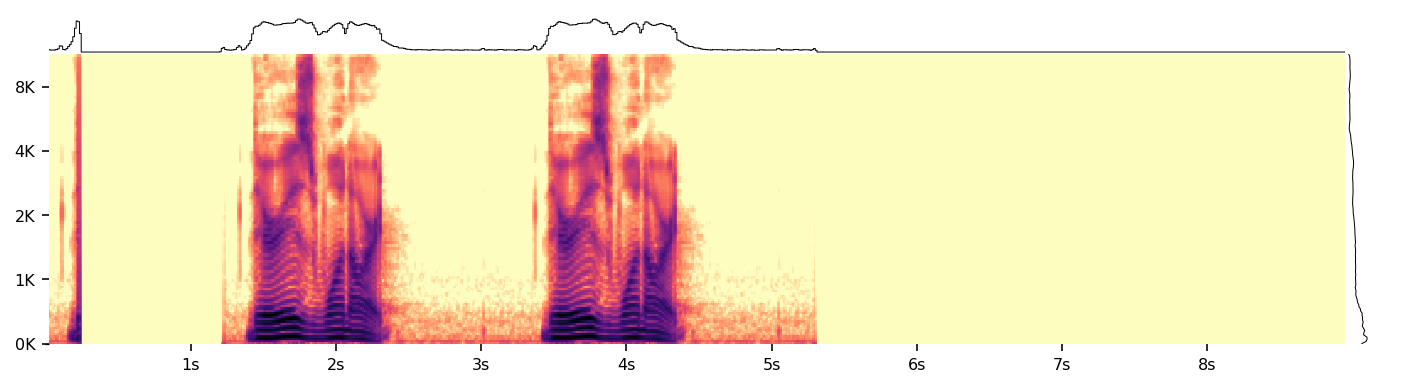

In [ ]:
# TODO Run slice on streaming input signal like https://audiokit.io/playgrounds/Effects/Sporth%20Based%20Effect/
#   - XXX XXX AAAAGGHH This is impossible. Everything is streaming. Can't buffer input to replay later. Fuck fuck fuck.
# pp(list(enumerate(np.arange(10) * 44100)))
sporth(raw=False, sample_rate=44100, sp=f'''

    # tick: Can only use once, must dup to reuse
    #   - [] -> [tick]
    tick

    # Create signal from file (to match https://audiokit.io/playgrounds/Effects/Sporth%20Based%20Effect/)
    #   - [tick] -> [tick, tabread]
    _file "{oneart}" loadfile # Load file into buffer
    (dup (0 (_file tbldur) (_file tblsize) line)) 0 0 0 _file tabread # [tick] -> [tick, tick] -> [tick, tabread]

    # Params
    _rec_dur  (_file tbldur)  varset _rec_dur  get _rec_dur  print drop
    _rec_size (_file tblsize) varset _rec_size get _rec_size print drop

    # Set total signal duration
    _rec_size get setdurs

    # Record input signal to buffer (for slice, which needs to read multiple times)
    #   - [tick, f] -> [tick] + _rec
    _rec _rec_size get zeros
    swap dup rot swap # [tick, f] -> [f, tick, tick] -> [tick, tick, f] -> [tick, f, tick]
    _rec tblrec       # [tick, f, tick] -> [tick, f] + _rec
    drop              # [tick, f] -> [tick]

    _rec tbldur  _rec_dur  print drop
    _rec tblsize _rec_size print drop

    # Make clips
    #   - [tick] -> [clip0, ..., clipN, tick]
    #   - clip: start/end, gain
    # (_i0  "88200 132300" gen_vals) dup (0 _i0 _rec slice) 1.0 * swap (((1 _i0 tget) (0 _i0 tget) sub) sdelay)
    # (_i1  "88200 132300" gen_vals) dup (0 _i1 _rec slice) 1.0 * swap (((1 _i1 tget) (0 _i1 tget) sub) sdelay)
    # (_i2 "220500 308700" gen_vals) dup (0 _i2 _rec slice) 1.0 * swap (((1 _i2 tget) (0 _i2 tget) sub) sdelay)
    # (_i3      "0 396900" gen_vals) dup (0 _i3 _rec slice) 1.0 * swap (((1 _i3 tget) (0 _i3 tget) sub) sdelay)
    (_i5      "0 10000"     gen_vals) dup (0 _i5 _rec slice) 1.0 * swap (((1 _i5 tget) (0 _i5 tget) sub) sdelay)
    (_i0  "88200 132300" gen_vals) dup (0 _i0 _rec slice) 1.0 * swap (((1 _i0 tget) (0 _i0 tget) sub) sdelay)
    (_i3      "1 89690" gen_vals) dup (0 _i3 _rec slice) 1.0 * swap (((1 _i3 tget) (0 _i3 tget) sub) sdelay)
    (_i4      "0 89690" gen_vals) dup (0 _i4 _rec slice) 1.0 * swap (((1 _i4 tget) (0 _i4 tget) sub) sdelay)

    # Mix signals
    #   - [s0, ..., sN, tick] -> [s0 + ... + sN]
    drop # Drop tick
    mix  # Add all signals on the stack

    # # Drop tick
    # #   - [tick, f] -> [f, tick] -> [f]
    # swap drop
    # drop

''')

In [ ]:
# Record file->table, then play table->signal
_sporth(sample_rate=44100, sp=f'''
    _rec "{oneart}" loadfile # Load input from file (into buffer for reuse)
    tick
    0 (_rec tbldur _tbldur print) (_rec tblsize _tblsize print) line _ix print
    0 0 0 _rec tabread _tabread print
    15 setdurs
''')

tbldur: "8.96583",
tblsize: "395393",
ix: "0",
tabread: "-0.00109684",
ix: "1",
tabread: "-0.00186241",
ix: "2",
tabread: "-0.00158334",
ix: "3",
tabread: "-0.00183582",
ix: "4",
tabread: "-0.0016948",
ix: "5",
tabread: "-0.0018065",
ix: "6",
tabread: "-0.00188649",
ix: "7",
tabread: "-0.00183797",
ix: "8",
tabread: "-0.00170982",
ix: "9",
tabread: "-0.00179613",
ix: "10",
tabread: "-0.00173295",
ix: "11",
tabread: "-0.00176013",
ix: "12",
tabread: "-0.00179923",
ix: "13",
tabread: "-0.00170994",
ix: "14",
tabread: "-0.00165761",


/tmp/0.wav: 1 channels, 32 bit, sampled @ 22.05 kHz, 9.000s long

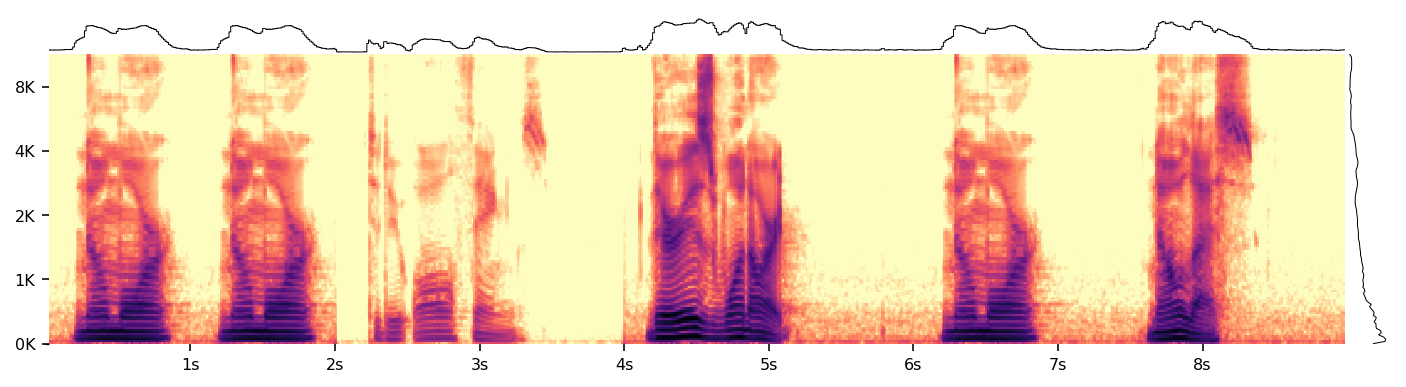

In [ ]:
# Sequence multiple clips (modularly)
#   - Woohoo!
#   - TODO TODO Port this to EditRec.newRecFromEdits: {clips: Array<{time, gain}>} [datatypes.ts]
#   - TODO TODO Add sporth node to native Spectro.editAudioPathToAudioPath [Spectro.swift]
# pp(list(enumerate(np.arange(10) * 44100)))
sporth(raw=False, sample_rate=44100, sp=f'''
    # Params
    _rec "{oneart}" loadfile # Load input from file (into buffer for reuse)
    9 sr * setdurs           # Set total signal duration
    # Start signal
    tick # Can only use once, must dup to reuse
    # Make signals
    #   - clips: start/end, gain
    (_i0  "88200 132300" gen_vals) dup (0 _i0 _rec slice) 1.0 * swap (((1 _i0 tget) (0 _i0 tget) sub) sdelay)
    (_i1  "88200 132300" gen_vals) dup (0 _i1 _rec slice) 1.0 * swap (((1 _i1 tget) (0 _i1 tget) sub) sdelay)
    (_i2 "220500 308700" gen_vals) dup (0 _i2 _rec slice) 0.1 * swap (((1 _i2 tget) (0 _i2 tget) sub) sdelay)
    (_i3      "0 396900" gen_vals) dup (0 _i3 _rec slice) 1.0 * swap (((1 _i3 tget) (0 _i3 tget) sub) sdelay)
    # Mix signals
    drop # Drop tick
    mix  # Add all signals on the stack
''')

In [ ]:
# Sequence multiple clips (modularly)
_sporth(sample_rate=1, sp=f'''
    # Debug: print time position
    pos _pos print drop
    # Load input from file (into buffer for reuse)
    _rec "{oneart}" loadfile
    # Set total output duration
    10 setdurs
    # tick: Can only use once, must dup to reuse
    tick # _trig print
    # Make clips
    #   - start/end
    #   - gain
    (_lohi_0 "3 6" gen_vals) dup (0 _lohi_0 _rec slice) 1   * _0 print swap (((1 _lohi_0 tget) (0 _lohi_0 tget) sub) sdelay)
    (_lohi_1 "4 7" gen_vals) dup (0 _lohi_1 _rec slice) 0.5 * _1 print swap (((1 _lohi_1 tget) (0 _lohi_1 tget) sub) sdelay)
    (_lohi_2 "5 8" gen_vals) dup (0 _lohi_2 _rec slice) 2   * _2 print swap (((1 _lohi_2 tget) (0 _lohi_2 tget) sub) sdelay)
    # Drop tick
    drop
    # Output: add all signals
    mix _+ print
''')

pos: "0",
0: "-0.00183582",
1: "0",
2: "0",
+: "-0.00183582",
pos: "1",
0: "-0.0016948",
+: "-0.0016948",
pos: "2",
0: "-0.0018065",
+: "-0.0018065",
pos: "3",
0: "0",
1: "-0.000847399",
+: "-0.000847399",
pos: "4",
1: "-0.000903249",
+: "-0.000903249",
pos: "5",
1: "-0.000943244",
+: "-0.000943244",
pos: "6",
1: "0",
2: "-0.003613",
+: "-0.003613",
pos: "7",
2: "-0.00377297",
+: "-0.00377297",
pos: "8",
2: "-0.00367594",
+: "-0.00367594",
pos: "9",
2: "0",
+: "0",


In [ ]:
_sporth(sample_rate=1, sp=f'''
    _rec "{oneart}" loadfile
    10 setdurs
    pos _pos print drop # Debug: print time position
    tick # _trig print
    _lohi_0 "3 6" gen_vals
    _lohi_1 "4 7" gen_vals
    _lohi_2 "5 8" gen_vals
    # 0 sdelay # Barfs
    dup 1 sdelay 0 _lohi_0 _rec slice _0 print swap
    dup 2 sdelay 0 _lohi_1 _rec slice _1 print swap
    dup 3 sdelay 0 _lohi_2 _rec slice _2 print swap
    # Drop tick
    drop
    # Output: add all signals (n-1 times)
    + + _+ print
''')

pos: "0",
0: "0",
1: "0",
2: "0",
+: "0",
pos: "1",
0: "-0.00183582",
+: "-0.00183582",
pos: "2",
0: "-0.0016948",
1: "-0.0016948",
+: "-0.0033896",
pos: "3",
0: "-0.0018065",
1: "-0.0018065",
2: "-0.0018065",
+: "-0.00541949",
pos: "4",
0: "0",
1: "-0.00188649",
2: "-0.00188649",
+: "-0.00377297",
pos: "5",
1: "0",
2: "-0.00183797",
+: "-0.00183797",
pos: "6",
2: "0",
+: "0",
pos: "7",
pos: "8",
pos: "9",


In [ ]:
_sporth(sample_rate=1, sp=f'''
    # _buf "{oneart}" loadfile
    10 setdurs
    pos _pos print drop
    tick _tick print
    dup 3 sdelay _sdelay0 print drop
    dup 4 sdelay _sdelay1 print drop
    3 5 sdelay _c print
''')

pos: "0",
tick: "1",
sdelay0: "0",
sdelay1: "0",
c: "0",
pos: "1",
tick: "0",
pos: "2",
pos: "3",
sdelay0: "1",
pos: "4",
sdelay0: "0",
sdelay1: "1",
pos: "5",
sdelay1: "0",
c: "3",
pos: "6",
pos: "7",
pos: "8",
pos: "9",


In [ ]:
_sporth(f'''
    5 setdurs

    pos #_pos0 print
    2 sdelay _sdelay print

    pos _pos1 print
    + _sum print
''')

sdelay: "0",
pos1: "0",
sum: "0",
pos1: "2.26757e-05",
sum: "2.26757e-05",
pos1: "4.53515e-05",
sum: "4.53515e-05",
sdelay: "2.26757e-05",
pos1: "6.80272e-05",
sum: "9.07029e-05",
sdelay: "4.53515e-05",
pos1: "9.07029e-05",
sum: "0.000136054",


In [ ]:
_sporth(f'''
    16 setdurs
    pos _pos print
    11025.0 metro _metro print
''')

pos: "0",
metro: "1",
pos: "2.26757e-05",
metro: "0",
pos: "4.53515e-05",
pos: "6.80272e-05",
pos: "9.07029e-05",
metro: "1",
pos: "0.000113379",
metro: "0",
pos: "0.000136054",
pos: "0.00015873",
pos: "0.000181406",
metro: "1",
pos: "0.000204082",
metro: "0",
pos: "0.000226757",
pos: "0.000249433",
pos: "0.000272109",
metro: "1",
pos: "0.000294785",
metro: "0",
pos: "0.00031746",
pos: "0.000340136",


/tmp/0.wav: 1 channels, 32 bit, sampled @ 22.05 kHz, 3.000s long

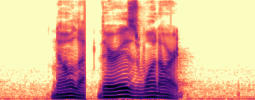

In [ ]:
sporth(f'''

    3.0 44100 * setdurs

    _buf "{oneart}" loadfile
    # _vals "6770 96139 159104 228847" gen_vals
    _vals "0 44100 88200 132300" gen_vals
    # _vals "0 44100 88200" gen_vals

    # _trig
    1.0 dmetro dup

    # _id
    (0 (_vals tblsize) trand) floor

    _vals
    _buf
    slice

''')

sample_rate: "44100",
dtrig: "1",
id: "1",
dtrig: "0",
id: "0",
dtrig: "1",
id: "1",
dtrig: "0",
id: "0",


/tmp/0.wav: 1 channels, 32 bit, sampled @ 22.05 kHz, 5.000s long

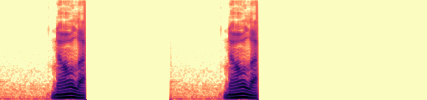

In [ ]:
sporth(env.from_string(open('/Users/danb/hack/bubo/Birdgram/app/sporth/_edit-clips-multi.sp.j2').read()).render(
    in_path=f'{oneart}',
    sample_rate=44100,
    start_s=3.0,
    end_s=5.0,
))

sample_rate: "44100",
start_s: "3",
start: "132300",
end_s: "5",
end: "220500",
setdurs: "88200",
vals_0: "132300",
trig: "1",
id: "0",
trig: "0",


/tmp/0.wav: 1 channels, 32 bit, sampled @ 22.05 kHz, 2.000s long

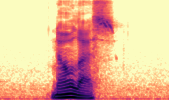

In [ ]:
sporth(env.from_string(open('/Users/danb/hack/bubo/Birdgram/app/sporth/_edit-clips-one.sp.j2').read()).render(
    in_path=f'{oneart}',
    sample_rate=44100,
    start_s=3.0,
    end_s=5.0,
))